## Bus Engine Replacement Prediction

Given *data about buses*, let's try to predict which engines will be **replaced**.

We will use a logistic regression model to make our predictions.

Data source: https://www.kaggle.com/datasets/erichschulman/bus1234.csv

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('archive/bus1234.csv')
data

,Unnamed: 0,id,group,year,month,replace,miles
0,0,144.0,50.0,1981.0,5.0,0.0,2208.0
1,1,144.0,50.0,1981.0,6.0,0.0,5418.0
2,2,144.0,50.0,1981.0,7.0,0.0,8547.0
3,3,144.0,50.0,1981.0,8.0,0.0,11566.0
4,4,144.0,50.0,1981.0,9.0,0.0,15890.0
...,...,...,...,...,...,...,...
8255,8255,95.0,530875.0,1985.0,1.0,0.0,342004.0
8256,8256,95.0,530875.0,1985.0,2.0,0.0,343654.0
8257,8257,95.0,530875.0,1985.0,3.0,0.0,345631.0
8258,8258,95.0,530875.0,1985.0,4.0,0.0,347549.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8260 entries, 0 to 8259
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8260 non-null   int64  
 1   id          8260 non-null   float64
 2   group       8260 non-null   float64
 3   year        8260 non-null   float64
 4   month       8260 non-null   float64
 5   replace     8260 non-null   float64
 6   miles       8260 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 451.8 KB


### Exploratory Data Analysis

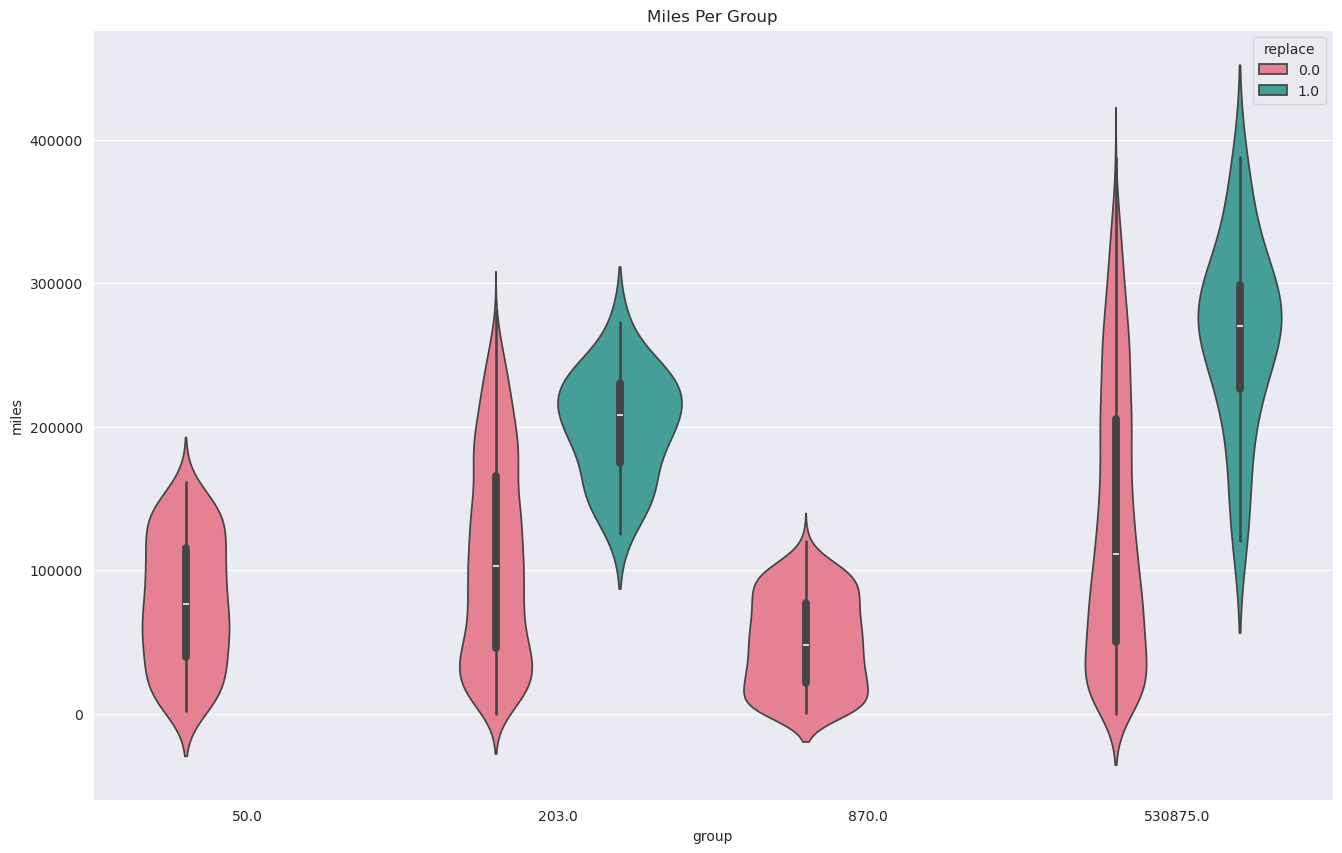

In [18]:
plt.figure(figsize=(16,10))
sns.violinplot(x=data['group'], y=data['miles'], hue=data['replace'], palette='husl')
plt.title('Miles Per Group')
plt.show()

In [19]:
data

,Unnamed: 0,id,group,year,month,replace,miles
0,0,144.0,50.0,1981.0,5.0,0.0,2208.0
1,1,144.0,50.0,1981.0,6.0,0.0,5418.0
2,2,144.0,50.0,1981.0,7.0,0.0,8547.0
3,3,144.0,50.0,1981.0,8.0,0.0,11566.0
4,4,144.0,50.0,1981.0,9.0,0.0,15890.0
...,...,...,...,...,...,...,...
8255,8255,95.0,530875.0,1985.0,1.0,0.0,342004.0
8256,8256,95.0,530875.0,1985.0,2.0,0.0,343654.0
8257,8257,95.0,530875.0,1985.0,3.0,0.0,345631.0
8258,8258,95.0,530875.0,1985.0,4.0,0.0,347549.0


In [20]:
data.groupby('year').sum()['replace']

year
1975.0     0.0
1976.0     0.0
1977.0     1.0
1978.0     2.0
1979.0     4.0
1980.0     4.0
1981.0     6.0
1982.0    13.0
1983.0     9.0
1984.0    15.0
1985.0     6.0
Name: replace, dtype: float64

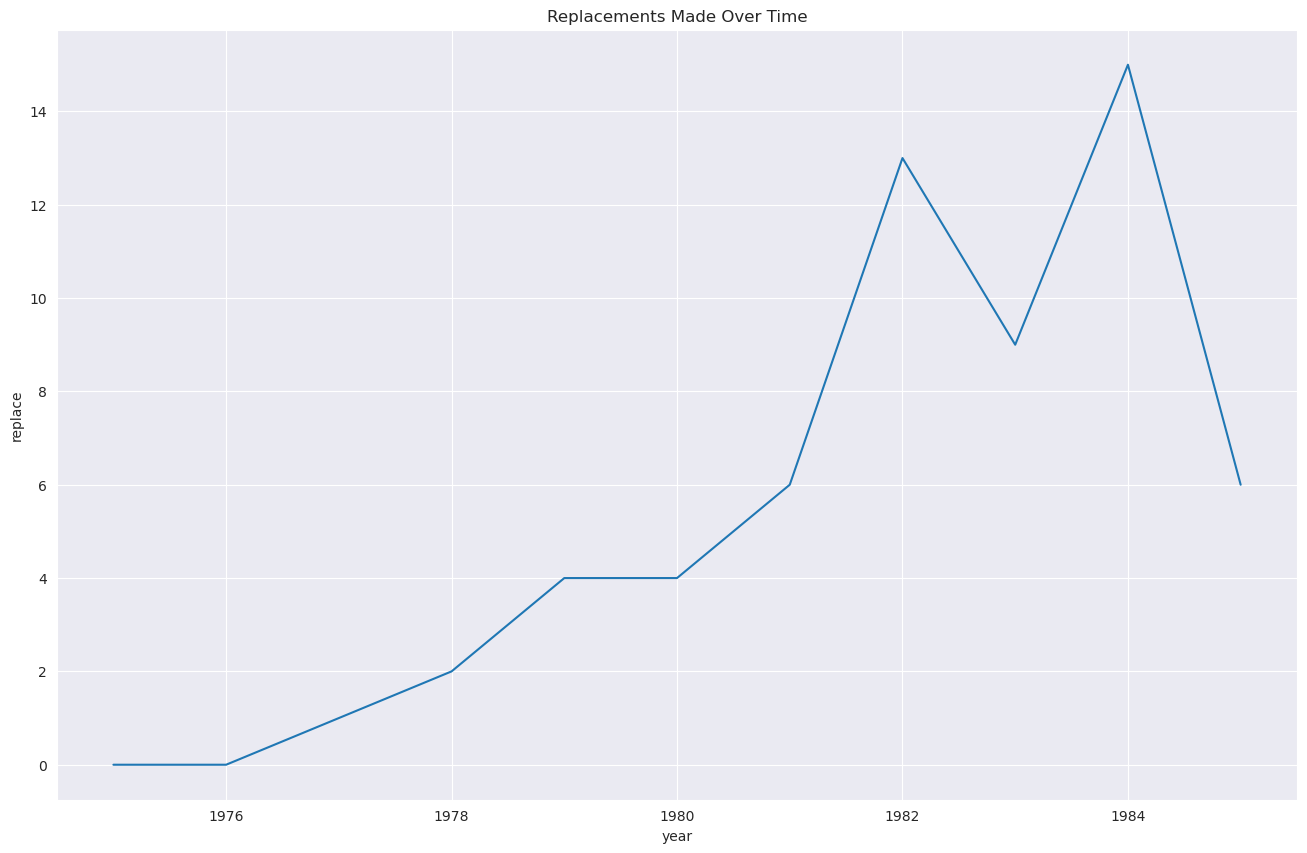

In [21]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=data.groupby('year').sum()['replace'])
plt.title('Replacements Made Over Time')
plt.show()

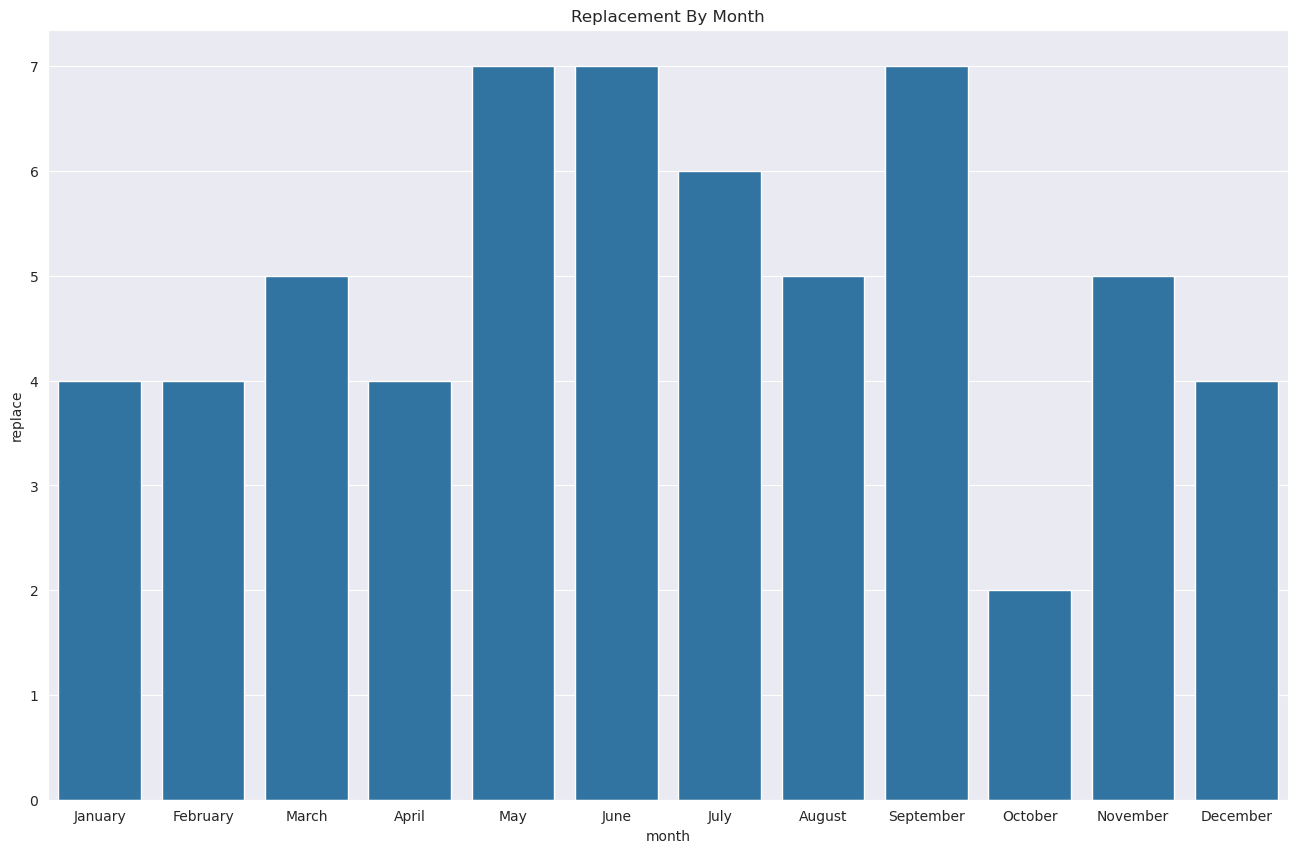

In [22]:
plt.figure(figsize=(16,10))
sns.barplot(x=data['month'], y=data.groupby('month').sum()['replace'])
plt.xticks(
    ticks = np.arange(12),
    labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)
plt.title("Replacement By Month")
plt.show()

### Preprocessing

In [23]:
df = data.copy()

In [24]:
# Drop index and id columns
df = df.drop(['Unnamed: 0'], axis=1)

In [27]:
len(df['id'].unique())

104

In [28]:
df

,id,group,year,month,replace,miles
0,144.0,50.0,1981.0,5.0,0.0,2208.0
1,144.0,50.0,1981.0,6.0,0.0,5418.0
2,144.0,50.0,1981.0,7.0,0.0,8547.0
3,144.0,50.0,1981.0,8.0,0.0,11566.0
4,144.0,50.0,1981.0,9.0,0.0,15890.0
...,...,...,...,...,...,...
8255,95.0,530875.0,1985.0,1.0,0.0,342004.0
8256,95.0,530875.0,1985.0,2.0,0.0,343654.0
8257,95.0,530875.0,1985.0,3.0,0.0,345631.0
8258,95.0,530875.0,1985.0,4.0,0.0,347549.0


In [33]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column, dtype=int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [34]:
for column in ['id', 'group']:
    df = onehot_encode(df, column)

In [35]:
df

,year,month,replace,miles,id_59.0,id_60.0,id_61.0,id_62.0,id_63.0,id_64.0,...,id_157.0,id_158.0,id_159.0,id_160.0,id_161.0,id_162.0,group_50.0,group_203.0,group_870.0,group_530875.0
0,1981.0,5.0,0.0,2208.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1981.0,6.0,0.0,5418.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1981.0,7.0,0.0,8547.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1981.0,8.0,0.0,11566.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1981.0,9.0,0.0,15890.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,1985.0,1.0,0.0,342004.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8256,1985.0,2.0,0.0,343654.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8257,1985.0,3.0,0.0,345631.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8258,1985.0,4.0,0.0,347549.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
# Split df into X and y
y = df['replace'].copy()
X = df.drop('replace', axis=1).copy()

In [37]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [38]:
X_train.shape, X_test.shape

((5782, 111), (2478, 111))

In [39]:
y_train.value_counts()

replace
0.0    5739
1.0      43
Name: count, dtype: int64

### Training

In [49]:
model = LogisticRegression(
    class_weight={
        0: 1.0,
        1: 10.0
    }
)
model.fit(X_train, y_train)

/home/aditya/miniconda3/envs/tfenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,"{0: 1.0, 1: 10.0}"
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Results

In [50]:
print("Test Accuracy: {:.2f}%".format(model.score(X_test, y_test)*100))

Test Accuracy: 98.79%


In [51]:
y_pred = model.predict(X_test)
print("Classification Report: \n", classification_report(y_test, y_pred, target_names=['No Replacement', 'Replacement']))

Classification Report: 
                 precision    recall  f1-score   support

No Replacement       0.99      0.99      0.99      2461
   Replacement       0.12      0.12      0.12        17

      accuracy                           0.99      2478
     macro avg       0.56      0.56      0.56      2478
  weighted avg       0.99      0.99      0.99      2478

